In [4]:
using DataFrames
using DataFramesMeta
using CSV


In [47]:
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\WDM\\RAV16\\Plates\\LONG-PM-NS-R1_R16_230302151337_S1_TEX.dat", DataFrame)
#df = CSV.read("\\Users\\royj\\development\\LONG-PM-NS-R1_R09_230302094024_S1_TEX.dat",DataFrame)
#df = CSV.read("\\\\trllimited\\data\\INF_TRACS\\TRACS5\\1 - Accreditation\\RAV17\\5-Accreditation-May23\\CC Output\\TRACS4\\Plates\\Texture\\RAV17_NS_Run_1_A.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV1 resubmission\\ProfileMats\\LONG-PM-NS-R2_rcd_AB1_tex.dat", DataFrame)
df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\PTS\\MFV2 sumbission2\\ProfileMats\\LONG-PM-NS-R1_AB1_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest4\\PM_Long\\NS\\T4_20230524_094145_GLUK_RCD_L1AB_tex.dat", DataFrame)
#df = CSV.read("\\\\trllimited\\data\\Vehicle_Validation_SCANNER\\Accreditation\\2023\\G-L\\Tempest3\\PM_Long\\NS\\T3_20230524_094200_GLUK_RCD_tex.dat", DataFrame)

Row,Chainage,Texture,Dropout
,Float64,Float64,Int64
1,4.0,27.1,0
2,4.001,27.5,0
3,4.002,27.2,0
4,4.003,24.9,0
5,4.004,24.7,0
6,4.005,25.1,0
7,4.006,25.4,0
8,4.007,25.7,0
9,4.008,25.1,0


In [48]:
minimum_texture = minimum(df.Texture)

adjustment_value = abs(minimum_texture)

#df.adjusted_Tex = df.Texture + adjustment_value
#df.adjusted_Tex = df.apply(lambda row: row.Texture + adjustment_value, axis=1)

readings_per_metre = length(df.Chainage) / maximum(df.Chainage)
println("readings per metre ", readings_per_metre)
hertz = readings_per_metre/2
println("hertz ", hertz)

readings per metre 714.3571428571429
hertz 357.17857142857144


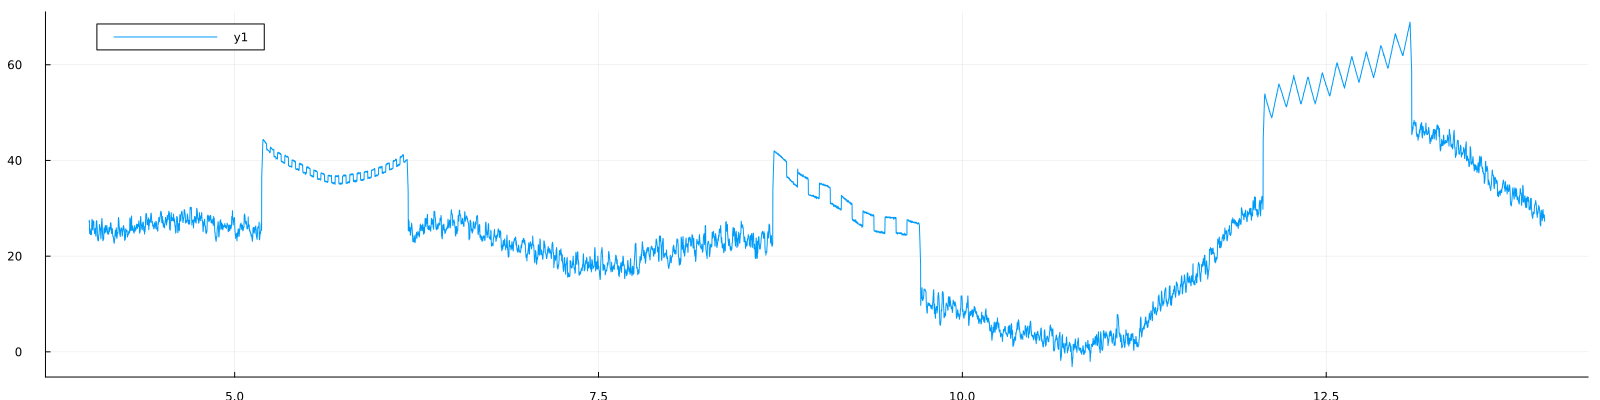

In [49]:
using Plots

#plotattr(size=(1200,400))
plot(df.Chainage
    , df.Texture
    , size=(1600,400))

In [50]:
# using DSP, Plots
# t = 1:1000; fs =2000; f0 = 60  # sampling and cutoff frequencies
# rawdata = df.Texture
# data_filt = filtfilt(digitalfilter(Lowpass(f0, fs=fs), Butterworth(1)), rawdata)
# plot(rawdata,label="input")
# plot!(data_filt, lc=:red, lw=2,label="filtered using filtfilt", size=(1600,400))

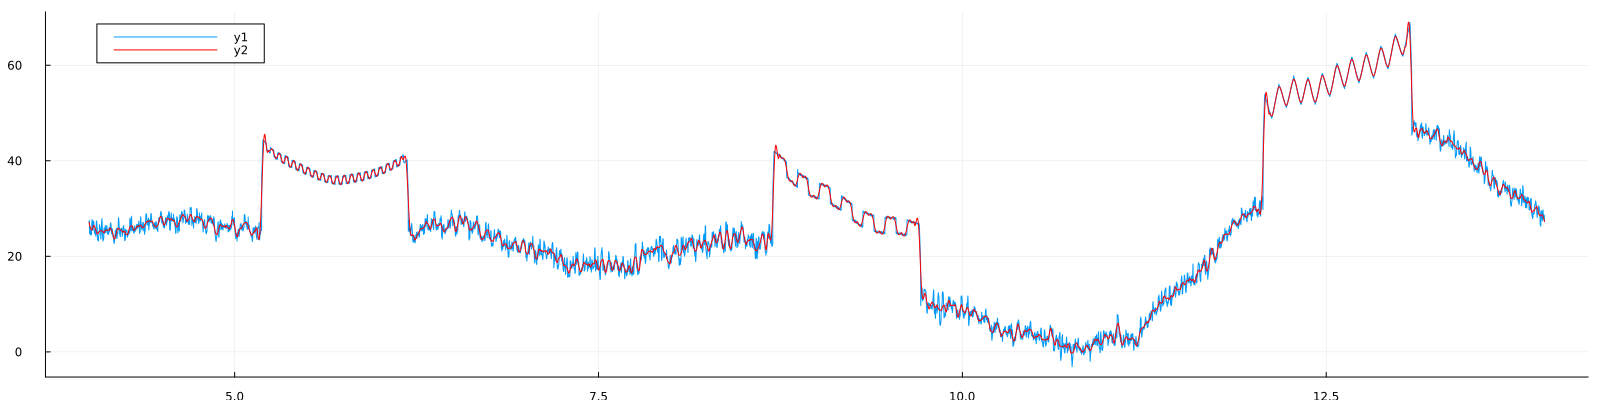

In [51]:
using SavitzkyGolay
using Plots
# from matplotlib import pyplot as plt
# import matplotlib as mpl
#sg = savitzky_golay(y::AbstractVector, window_size::Int, order::Int; deriv::Int=0, rate::Real=1.0)

sg = savitzky_golay(df.Texture, 99, 6) 

# print(len(df.Chainage))
# plt.subplots(figsize=(20,5))
# plt.plot(df.Chainage, df.Texture)
#plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))
plot(df.Chainage,df.Texture,size=(1600,400))
plot!(df.Chainage, sg.y,lc=:red)

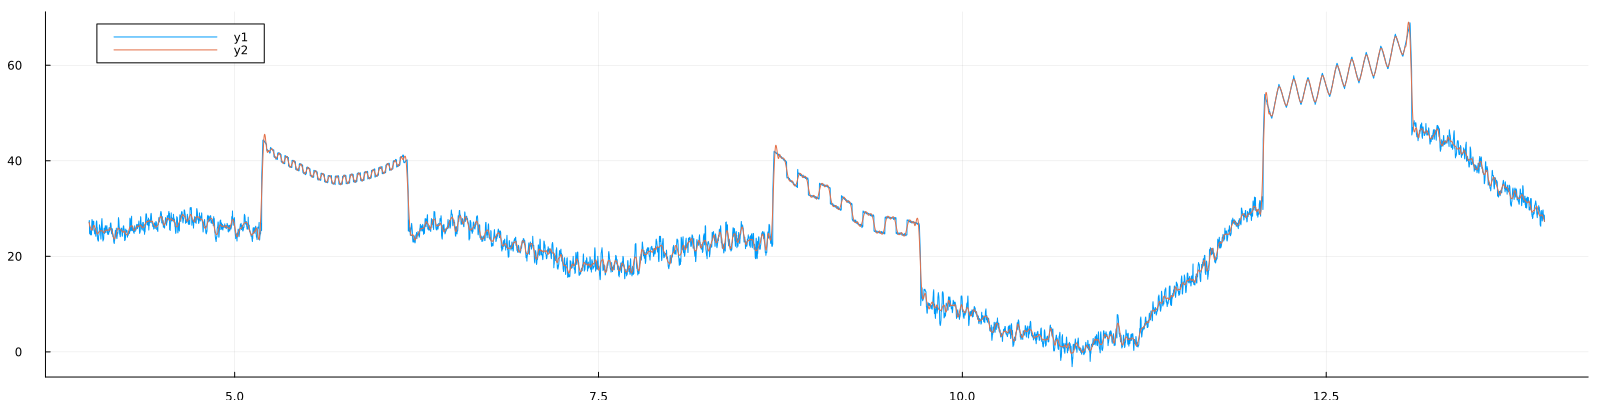

In [52]:
plot(df.Chainage,[df.Texture,sg.y],size=(1600,400))

In [53]:
filtered_tex = sg.y
df.sg = sg.y

10001-element Vector{Float64}:
 27.100001287991244
 26.890142556863868
 26.70462173778696
 26.569151083216326
 26.46277485399419
 26.3788172224483
 26.28407908132781
 26.17673974161553
 26.0973715748384
 25.999280501634487
  ⋮
 28.03209676764185
 27.934893613771116
 27.845473774842684
 27.7549263580324
 27.66332321193444
 27.57551971921481
 27.485890413629726
 27.40277181599674
 27.300000290409915

In [54]:
# Need to figure out where the input signal increases or decreases by a significant value, find the absolute change between the data readings.
# create abs_data_diff

using ShiftedArrays: lead
df_diff_calc = transform(df, :sg => (x -> x - lead(x,3)) => :data_diff)
transform!(df_diff_calc, :data_diff => (ByRow(x -> abs(x)) => :abs_data_diff))


Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64?
1,4.0,27.1,0,27.1,0.53085,0.53085
2,4.001,27.5,0,26.8901,0.427368,0.427368
3,4.002,27.2,0,26.7046,0.325805,0.325805
4,4.003,24.9,0,26.5692,0.285072,0.285072
5,4.004,24.7,0,26.4628,0.286035,0.286035
6,4.005,25.1,0,26.3788,0.281446,0.281446
7,4.006,25.4,0,26.2841,0.284799,0.284799
8,4.007,25.7,0,26.1767,0.270132,0.270132
9,4.008,25.1,0,26.0974,0.282251,0.282251


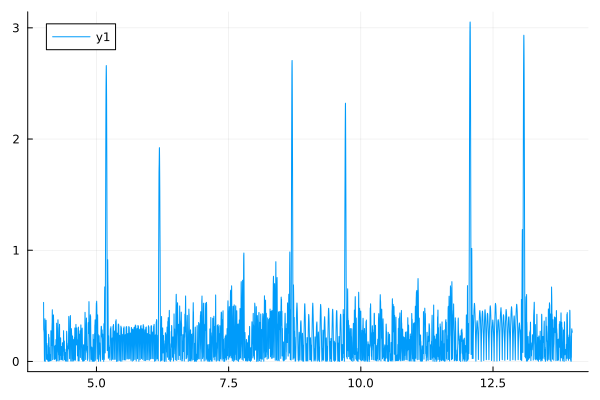

In [55]:
plot(df_diff_calc.Chainage, df_diff_calc.abs_data_diff)


In [56]:
threshold = 1.5  # Given threshold
exceed_points = Int[]
@transform!(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 1))
prev_val = df_diff_calc[1, :abs_data_diff]

for i in 1:5:length(df_diff_calc[!,:abs_data_diff])
    
    current_val = df_diff_calc[i, :abs_data_diff]

    if current_val > threshold
        push!(exceed_points, i)
    end

end

println("Points at which the difference in values exceeds $threshold: are $exceed_points")

Points at which the difference in values exceeds 1.5: are [1176, 1181, 1186, 1191, 1196, 2186, 2191, 2196, 4691, 4696, 4701, 4706, 4711, 5701, 5706, 5711, 5716, 8056, 8061, 8066, 8071, 8076, 9076, 9081, 9086, 9091, 9096]


In [57]:
#println(exceed_points)

plate_boundaries = []
differences = diff(exceed_points)
#plate_start = exceed_points[1]

for i in 1:length(differences)
    if differences[i] > 90 && differences[i] <= 1100
        push!(plate_boundaries, exceed_points[i])
        push!(plate_boundaries, exceed_points[i+1])
        #plate_start=0
    end
end

print(plate_boundaries)

Any[1196, 2186, 4711, 5701, 8076, 9076]

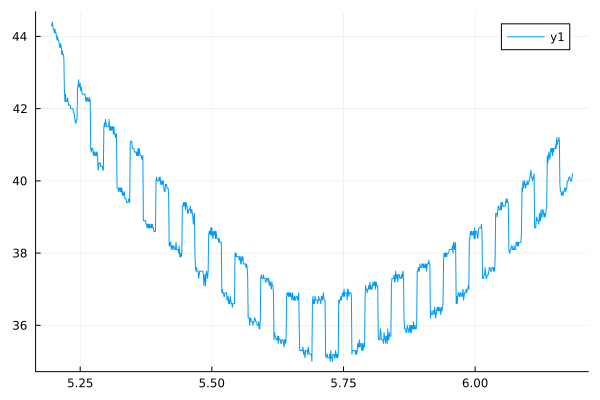

In [58]:

plate1 = df_diff_calc[plate_boundaries[1]:plate_boundaries[2],:]

plot(plate1.Chainage, plate1.Texture)

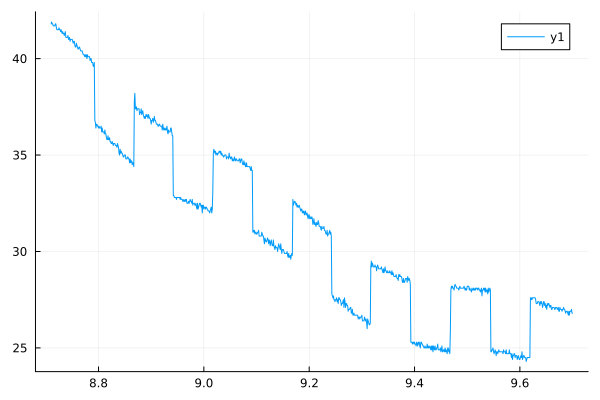

In [59]:
plate2 = df_diff_calc[plate_boundaries[3]:plate_boundaries[4],:]

plot(plate2.Chainage, plate2.Texture)

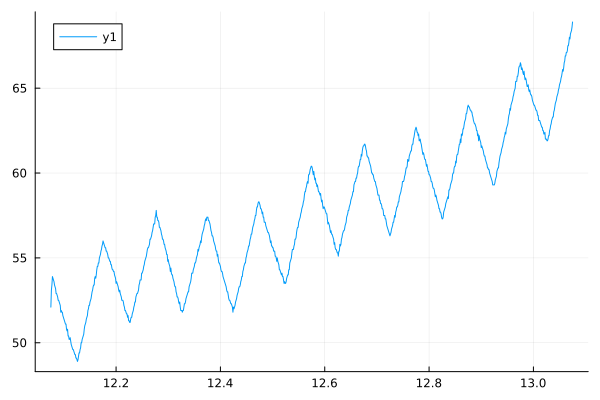

In [60]:
plate3 = df_diff_calc[plate_boundaries[5]:plate_boundaries[6],:]

plot(plate3.Chainage, plate3.Texture)

In [61]:
using CurveFit
using Statistics

function texture_plate_analysis(plate, poly_const)

    #using CurveFit
    #using Statistics

    poly = curve_fit(Polynomial, plate.Chainage, plate.Texture, poly_const)
    plate.basepoly = poly.(plate.Chainage)

    plate.corrected = plate.Texture - plate.basepoly

    plot(plate1.Chainage, plate.Texture)
    plot!(plate1.Chainage, plate.basepoly)
    plot!(plate1.Chainage, plate.corrected)

    plate_average = mean(plate.corrected)
    println(plate_average)

    #calculate the mean values of the corrected values above the mean

    mean_above_average = mean(plate[plate[!,:corrected].>plate_average,:].corrected)
    println(mean_above_average)

    mean_below_average = mean(plate[plate[!,:corrected].<plate_average,:].corrected)
    println(mean_below_average)

    mean_plate_height = diff([mean_above_average,mean_below_average])

    return abs(mean_plate_height[1])

    

end

texture_plate_analysis (generic function with 1 method)

In [62]:
plate1_height = texture_plate_analysis(plate1,14)

print(plate1_height)
flush(stderr)

-0.009518424010525677
0.6912266572148159
-0.7116791518646057
1.4029058090794218

In [63]:
plate2_height = texture_plate_analysis(plate2,14)

print(plate2_height)
flush(stderr)

-0.005793068054192839
1.4649788455365909
-1.3597013218441585
2.824680167380749

In [64]:
plate3_height = texture_plate_analysis(plate3,14)

# as this is the triangle plate double the height

plate3_height = plate3_height * 2
print(plate3_height)
flush(stderr)

0.016234117014149015
1.4576924929617445
-1.4223470965064053
5.7600791789363

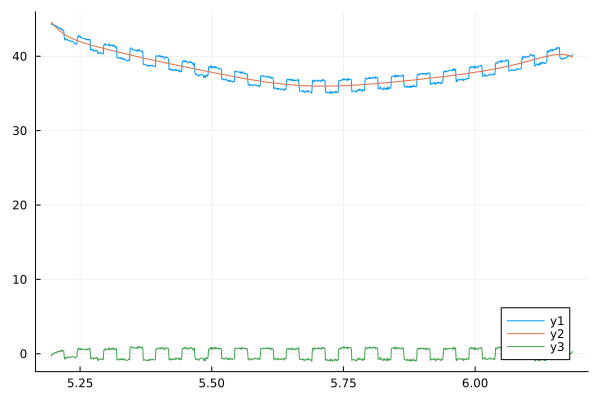

In [86]:
using CurveFit
poly = curve_fit(Polynomial, plate1.Chainage, plate1.Texture, 14)
plate1.basepoly = poly.(plate1.Chainage)

plate1.corrected = plate1.Texture - plate1.basepoly

plot(plate1.Chainage, plate1.Texture)
plot!(plate1.Chainage, plate1.basepoly)
#plot!(plate3.Chainage, plate3.baseexp)
plot!(plate1.Chainage, plate1.corrected)
#plot!(plate3.Chainage, plate3.expcorrected)

In [87]:
using Statistics

plate1_average = mean(plate1.corrected)
println(plate1_average)
#calculate the mean values of the corrected values above the mean

mean_above_average = mean(plate1[plate1[!,:corrected].>plate1_average,:].corrected)
println(mean_above_average)
#plate1[plate1[!,:corrected].>plate1_average,:]
mean_below_average = mean(plate1[plate1[!,:corrected].<plate1_average,:].corrected)
print(mean_below_average)

-0.009518424010525677
0.6912266572148159
-0.7116791518646057

In [114]:
using Statistics
using CurveFit

function texture_plate_analysis(plate, poly_const)

    #using CurveFit
    #using Statistics

    poly = curve_fit(Polynomial, plate.Chainage, plate.Texture, poly_const)
    plate.basepoly = poly.(plate.Chainage)

    plate.corrected = plate.Texture - plate.basepoly

    plot(plate1.Chainage, plate.Texture)
    plot!(plate1.Chainage, plate.basepoly)
    plot!(plate1.Chainage, plate.corrected)

    plate_average = mean(plate.corrected)
    #println(plate_average)

    #calculate the mean values of the corrected values above the mean

    mean_above_average = mean(plate[plate[!,:corrected].>plate_average,:].corrected)
    #println(mean_above_average)

    mean_below_average = mean(plate[plate[!,:corrected].<plate_average,:].corrected)
    #println(mean_below_average)

    mean_plate_height = diff([mean_above_average,mean_below_average])

    #return abs(mean_plate_height[1])
    plate_average = mean(plate1.corrected)

    #println(plate_average)
    #calculate the mean values of the corrected values above the mean
    
    mean_above_average = mean(plate[plate[!,:corrected].>plate_average,:].corrected)
    #println(mean_above_average)
    #plate1[plate1[!,:corrected].>plate1_average,:]
    mean_below_average = mean(plate[plate[!,:corrected].<plate_average,:].corrected)
    #println(mean_below_average)
    
    # Calculate the number of rows for the middle 90%
    n_rows = nrow(plate)
    start_idx = Int(round(0.05 * n_rows) + 1)
    end_idx = Int(round(0.95 * n_rows))

    # Select the middle 90% of the rows
    middle_90_percent_df = plate[start_idx:end_idx, :]

    middle_average = mean(middle_90_percent_df.corrected)
    middle_mean_above_average = mean(middle_90_percent_df[middle_90_percent_df[!,:corrected].>middle_average,:].corrected)
    middle_mean_below_average = mean(middle_90_percent_df[middle_90_percent_df[!,:corrected].<middle_average,:].corrected)

    println(plate_average, " ave ", mean_above_average, " mean_above_average ", mean_below_average, " below avg")

    println("difference ", diff([mean_above_average, mean_below_average]))

    println(middle_average, " ave ", middle_mean_above_average, " middle_mean_above_average ", middle_mean_below_average, " middle below avg")

    println("difference ", diff([middle_mean_above_average, middle_mean_below_average]))
end


texture_plate_analysis (generic function with 1 method)

In [115]:
plate1_height = texture_plate_analysis(plate1,14)

plate2_height = texture_plate_analysis(plate2,14)

plate3_height = texture_plate_analysis(plate3,14)

-0.009518424010525677 ave 0.6912266572148159 mean_above_average -0.7116791518646057 below avg
difference [-1.4029058090794218]
-0.014111747189262166 ave 0.7167574919066256 middle_mean_above_average -0.7433422660181188 middle below avg
difference [-1.4600997579247443]
-0.009518424010525677 ave 1.4649788455365909 mean_above_average -1.3597013218441585 below avg
difference [-2.824680167380749]
0.026980408042274508 ave 1.5567338781868862 middle_mean_above_average -1.4587757277840188 middle below avg
difference [-3.0155096059709052]
-0.009518424010525677 ave 1.4461567652738099 mean_above_average -1.4338282868548036 below avg
difference [-2.8799850521286134]
0.02708112016963811 ave 1.5385428638390617 middle_mean_above_average -1.4610761472758074 middle below avg
difference [-2.999619011114869]


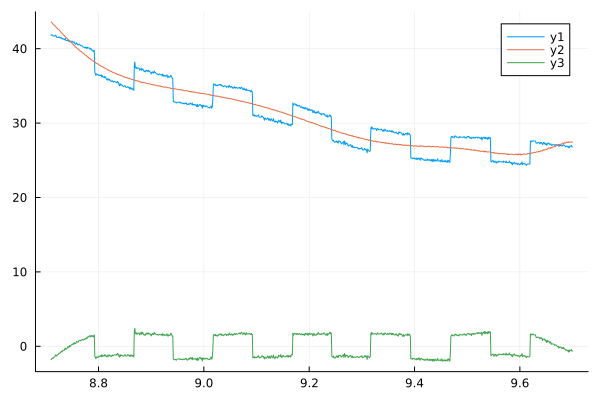

In [88]:
poly = curve_fit(Polynomial, plate2.Chainage, plate2.Texture, 14)
plate2.basepoly = poly.(plate2.Chainage)

plate2.corrected = plate2.Texture - plate2.basepoly

plot(plate2.Chainage, plate2.Texture)
plot!(plate2.Chainage, plate2.basepoly)
#plot!(plate3.Chainage, plate3.baseexp)
plot!(plate2.Chainage, plate2.corrected)
#plot!(plate3.Chainage, plate3.expcorrected)

In [89]:
# find the average of the corrected data
using Statistics
plate2_average = mean(plate2.corrected)
println(plate2_average)
flush(stdout)
#calculate the mean values of the corrected values above the mean

mean_above_average = mean(plate2[plate2[!,:corrected].>plate2_average,:].corrected)
println(mean_above_average)
flush(stdout)
#plate1[plate1[!,:corrected].>plate1_average,:]
mean_below_average = mean(plate2[plate2[!,:corrected].<plate2_average,:].corrected)
print(mean_below_average)
flush(stdout)

-0.005793068054192839
1.4649788455365909
-1.3597013218441585

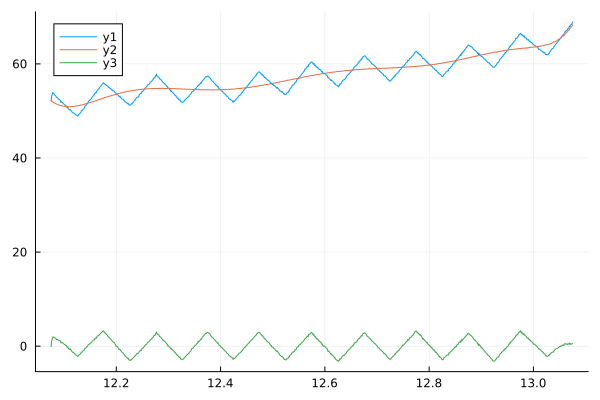

In [90]:
using CurveFit

poly = curve_fit(Polynomial, plate3.Chainage, plate3.Texture, 14)
plate3.basepoly = poly.(plate3.Chainage)

plate3.corrected = plate3.Texture - plate3.basepoly
#plate3.expcorrected = plate3.Texture - plate3.baseexp

plot(plate3.Chainage, plate3.Texture)
plot!(plate3.Chainage, plate3.basepoly)
#plot!(plate3.Chainage, plate3.baseexp)
plot!(plate3.Chainage, plate3.corrected)
#plot!(plate3.Chainage, plate3.expcorrected)

In [96]:
using Statistics
plate3_average = mean(plate3.corrected)
println(plate3_average)
flush(stdout)
#calculate the mean values of the corrected values above the overall mean

mean_above_average = mean(plate3[plate3[!,:corrected].>plate3_average,:].corrected)
println(mean_above_average)
flush(stdout)

# and below mean
#plate1[plate1[!,:corrected].>plate1_average,:]
mean_below_average = mean(plate3[plate3[!,:corrected].<plate3_average,:].corrected)
print(mean_below_average)
flush(stdout)

abs(diff([mean_above_average, mean_below_average])[1]*2)

0.016234117014149015
1.4576924929617445
-1.4223470965064053

5.7600791789363

In [73]:
# plate3_average

In [74]:
# mean_below_average

In [75]:
@transform!(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 1))

df_diff_calc

Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64
1,4.0,27.1,0,27.1,0.53085,0.53085
2,4.001,27.5,0,26.8901,0.427368,0.427368
3,4.002,27.2,0,26.7046,0.325805,0.325805
4,4.003,24.9,0,26.5692,0.285072,0.285072
5,4.004,24.7,0,26.4628,0.286035,0.286035
6,4.005,25.1,0,26.3788,0.281446,0.281446
7,4.006,25.4,0,26.2841,0.284799,0.284799
8,4.007,25.7,0,26.1767,0.270132,0.270132
9,4.008,25.1,0,26.0974,0.282251,0.282251


In [76]:
threshold = 1.5 # Given threshold
exceed_points = [] # will be a list of rows near the edges of the plate.


prev_val = df_diff_calc[1,:abs_data_diff]
end_of_df = length(df_diff_calc[!,:abs_data_diff])
println("end ",end_of_df)
println("first previous ",prev_val)
@transform(df_diff_calc, :abs_data_diff = replace(:abs_data_diff, missing => 0))
#loop_range = range(1, 15, end_of_df)
# outer loop means that only the row numbers vivisable by 15 are processed
for i in 1:end_of_df
  # current_val = df.iloc[i]['Texture'] 
  if i % 12 == 0
    #println("pos ", i)
  
  #int_i = 
  
  current_val = df_diff_calc[i, :abs_data_diff]
  print(current_val)
    if abs(current_val - prev_val) > threshold
      append!(exceed_points, i)
      #i= i + 700
      prev_val = current_val
    #
    end
  end
end
println("Points at which the difference in values exceeds $threshold are $exceed_points")

end 10001
first previous 0.530850204774918
0.224950920247245280.303104454775990460.261317467962097540.37009211625305130.102347727094368680.036426497821096860.0145512851070712660.243732640264344270.107827927434730240.00394550735307319660.057067728138694210.0071982475074250370.16911046194982050.374869284599885330.266847145538868350.31959243804330840.12465954216221320.03633423503545430.094627655237719210.045635776994632950.144148293797847770.137133951123079360.27597328044572580.0506070674947451950.306864386178034470.096605158163132640.209420300394580040.134757826604023020.113261467704180770.110694762504543580.050241294106040610.148349741270315860.067974033193515030.043935830141784040.015541074333651040.00229937693449144830.1341487292734520.0106282944840963010.164730386411196860.39065521777384760.056220591662036410.282217423322503440.105119762695178310.28533134129659390.0243101868352404440.085271165883906260.0510352237704658760.0140677372034296870.184842891011694380.0123049232078891180.325

In [77]:
threshold = 22 # Given threshold
exceed_points = []

prev_val = df[1,:Texture]
end_of_df = length(df[!,:Texture])
println("end ",end_of_df)
println("first tex ",prev_val)
#loop_range = range(1, 15, end_of_df)
# outer loop means that only the row numbers vivisable by 15 are processed
for i in 1:end_of_df
  # current_val = df.iloc[i]['Texture'] 
  if i % 12 == 0
    #println("pos ", i)
  
  #int_i = 
  
  current_val = df[i, :Texture]
    if abs(current_val - prev_val) > threshold
      append!(exceed_points, i)
      #i= i + 700
      prev_val = current_val
    #
    end
  end
end
println("Points at which the difference in values exceeds $threshold are $exceed_points")

end 10001
first tex 27.1
Points at which the difference in values exceeds 22 are Any[6192, 7860, 8076, 9912]


In [78]:
# return the rows where the difference is greater than a given value

potential_plates = subset(df_diff_calc, :abs_data_diff => ByRow(abs_data_diff -> abs_data_diff > 2), skipmissing=true)
#
#textureΔ =
#mapcols(data_diff -> df_diff_calc)

Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64
1,5.177,24.9,0,26.6635,-2.04208,2.04208
2,5.178,24.7,0,27.2892,-2.18589,2.18589
3,5.179,25.4,0,27.9733,-2.30504,2.30504
4,5.18,25.3,0,28.7056,-2.39751,2.39751
5,5.181,25.9,0,29.4751,-2.4737,2.4737
6,5.182,26.6,0,30.2784,-2.53079,2.53079
7,5.183,26.9,0,31.1031,-2.5715,2.5715
8,5.184,26.0,0,31.9488,-2.61416,2.61416
9,5.185,25.4,0,32.8092,-2.64884,2.64884


In [79]:
print("fred")

fred

In [80]:
#length_of_df = length(potential_plates[!,1])
length_of_df = length(df_diff_calc[!,1])
println(length_of_df)
df_diff_calc.data_diff[ismissing.(df_diff_calc.data_diff)] .= 0

# global df_diff_calc
i=1
# global plate_start =1
# global plate_end= 2
# global plate_position = 1

while i <= length_of_df

    println(i)
    #plate_position = i
    #plate_start=1
    #plate_end=1
    abs_data_diff = df_diff_calc[i,:abs_data_diff]
    #int_data_diff: Float64 = df_diff_calc[i,:data_diff]
    int_data_diff = df_diff_calc[i,:data_diff]
    #println(plate_position) # , "DATA DIFF ",int_data_diff)

    if ismissing(int_data_diff) int_data_diff = 0 end

    print(int_data_diff)

    if int_data_diff <= -2.0
        plate_start = i
        println("row ", i, " data_diff ",int_data_diff)
        i = i + 800
    # else
    #     i+=1
        #continue
    end

    # if int_data_diff >= 2
    #     plate_end = i
    #     i =i +1000
    #     println( "start ", plate_start)
    #     println("End ", plate_end)
    # end
    global i +=1
    
end


10001
1
0.5308502047749182
0.42736770286967743
0.32580451533866044
0.285072001888515565
0.28603511237865936
0.281445647609899657
0.2847985796933238
0.270131980539126469
0.282250743101165810
0.2706274500878862511
0.2518855887886317612
0.2249509202472452813
0.1818666455135442614
0.1429452722806097115
0.0772349348845544616
0.0445559539221349617
-0.003719489348195992318
-0.02312082732060005719
-0.0775837652602504620
-0.099096642385450921
-0.135707848210010722
-0.170960435517393723
-0.2399837793820367424
-0.3031044547759904625
-0.365105258515427526
-0.384026553152462927
-0.369610955555408828
-0.2968885076671199429
-0.220533632938806830
-0.1403470473653811731
-0.0661561890110888832
-0.000991247899349900833
0.0670910316356980734
0.1355438982117824835
0.2127618943560065636
0.2613174679620975437
0.287216451229596738
0.258380466972081339
0.232927194636005240
0.194979272600772241
0.2043767456009639742
0.2223451249063970243
0.24537696886394444
0.2426486470313413745
0.2344016252963143646
0.27408136

In [81]:
while i <= 3
    println(i)
    global i += 1
end
println(i)

10002


In [82]:
i=1

while i <= 3
    println(i)
    global i += 1
end
println(i)

1
2
3
4


In [83]:
length_of_df

10001

In [84]:
df_diff_calc

Row,Chainage,Texture,Dropout,sg,data_diff,abs_data_diff
,Float64,Float64,Int64,Float64,Float64?,Float64
1,4.0,27.1,0,27.1,0.53085,0.53085
2,4.001,27.5,0,26.8901,0.427368,0.427368
3,4.002,27.2,0,26.7046,0.325805,0.325805
4,4.003,24.9,0,26.5692,0.285072,0.285072
5,4.004,24.7,0,26.4628,0.286035,0.286035
6,4.005,25.1,0,26.3788,0.281446,0.281446
7,4.006,25.4,0,26.2841,0.284799,0.284799
8,4.007,25.7,0,26.1767,0.270132,0.270132
9,4.008,25.1,0,26.0974,0.282251,0.282251


In [85]:
# # find the regression line for plate 1
# using GLM
# model = lm(@formula(Texture ~ 1 + Chainage + Chainage^2), plate1)  # Note how the formula looks exactly like the model you want to build
# plot(plate1.Chainage, predict(model, plate1), label="model")
# plot!(plate1.Chainage, plate1.Texture)

# plate1.baseline = predict(model,plate1)

# plate1.corrected = plate1.Texture - plate1.baseline

# plot!(plate1.Chainage, plate1.corrected)
